# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

> <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-info-2558213.png?raw=1" alt="?" style="width:25px"/> Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. If you are using Jupyter Lab, you can use **File -> Export Notebook as -> Export Notebook to HTML**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-info-2558213.png?raw=1" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg?raw=1" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

Next cell has been used to clone my repo on Colab

In [1]:
!git clone https://github.com/karencfisher/landmark-classifier.git
%cd landmark-classifier


Cloning into 'landmark-classifier'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 296 (delta 13), reused 22 (delta 8), pack-reused 260 (from 1)
Receiving objects: 100% (296/296), 5.80 MiB | 20.61 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/landmark-classifier


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
done


Computing std: 100%|████████████████████████| 6246/6246 [01:15<00:00, 82.27it/s]


---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended.

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [ ]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 4 items / 1 deselected / 3 selected

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 9.36s =======================


You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-info-2558213.png?raw=1" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ```
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
>
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-question-mark-869751.png?raw=1" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data.
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-answer-3361020.png?raw=1" alt=">" style="width:25px"/> **Answer**:
1) My code first resizes the image to 256 by the smallest dimension of the original image to keep the aspect ratio the same. I then randomly crop to 224 x 224. This way I will get varied crops of the same images for augmentation, and vary brightness, contrast, and saturation to simulate different lighting and camera quality.  

2) I augment the dataset via RandAugment. Transformations were:

```
transforms.RandomResizedCrop(224),
transforms.ColorJitter(.2, .2, .1),
transforms.RandAugment()
```

I feel at thi spoint that flipping is not natural to landscape images. But changes in lighting and being framed differently (slanted, translated differently, etc.) may more simulate how a tourist may point at
the scene with their camera with differing conditions.

### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [ ]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 4 items / 3 deselected / 1 selected

src/data.py::test_visualize_one_batch PASSED                             [100%]

============================== warnings summary ===============================
src/data.py::test_visualize_one_batch
src/data.py::test_visualize_one_batch
  C:\Users\karen\Anaconda3\envs\pytorch-course\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-key

We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


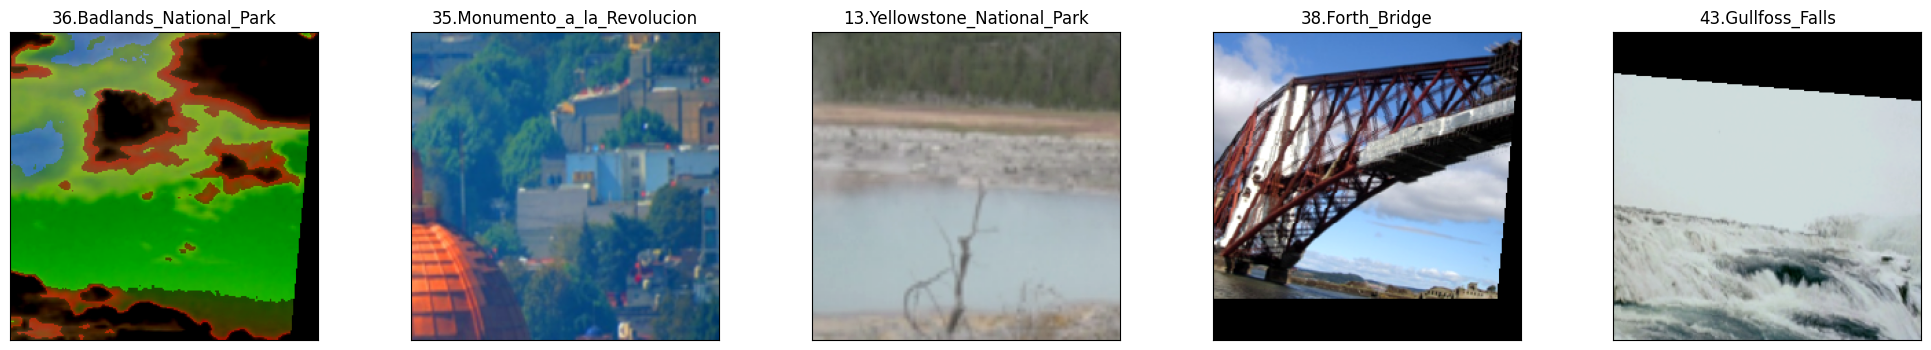

In [3]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(5, 0.01, num_workers=-1)

visualize_one_batch(data_loaders)

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [4]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.12.12, pytest-8.4.2, pluggy-1.6.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/landmark-classifier
plugins: typeguard-4.4.4, langsmith-0.4.59, anyio-4.12.0
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 3.52s ===============================


<img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-question-mark-869751.png?raw=1" alt="?" style="width:25px"/> **Question**: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

<img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-answer-3361020.png?raw=1" alt=">" style="width:25px"/> __Answer:__ Inspired by the VGG architecture, I thought I'd play with its use of a seried of convolutional blocks that can be of varied numbers of layers. So I looked up the architecture and tried reproducing it from scratch, learning about that particular pattern. It also lets me experiment with using custom layers as well, building models in a more modular fashion.

<small>References:
<ol>
<li>https://medium.com/@siddheshb008/vgg-net-architecture-explained-71179310050f</li>
<li>https://en.wikipedia.org/wiki/VGGNet</li>
</ol>
</small>

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [ ]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 7 items / 6 deselected / 1 selected

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 2.65s =======================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [ ]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 7 items / 1 deselected / 6 selected

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 4.28s =======================


---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-info-2558213.png?raw=1" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 4 items / 3 deselected / 1 selected

src/train.py::test_train_one_epoch PASSED                                [100%]

====================== 1 passed, 3 deselected in 14.91s =======================


Now complete the `valid` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k valid_one_epoch

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 4 items / 3 deselected / 1 selected

src/train.py::test_valid_one_epoch PASSED                                [100%]

============================== warnings summary ===============================
src/train.py::test_valid_one_epoch
src/train.py::test_valid_one_epoch
  c:\Users\karen\udacity\DeepLearning\landmark_classifier\src\train.py:240: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
    assert not np.isnan(acc), "Validation accuracy is nan"

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
================ 1 passed, 3 deselected, 2 warnings 

Now complete the `optimize` function, then run the tests:

In [ ]:
!pytest -vv src/train.py -k optimize

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 4 items / 3 deselected / 1 selected

src/train.py::test_optimize PASSED                                       [100%]

====================== 1 passed, 3 deselected in 19.37s =======================


Finally, complete the `test` function then run the tests:

In [ ]:
!pytest -vv src/train.py -k one_epoch_test

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 4 items / 3 deselected / 1 selected

src/train.py::test_one_epoch_test PASSED                                 [100%]

====================== 1 passed, 3 deselected in 11.58s =======================


---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [6]:
batch_size = 32        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 180        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.15          # dropout for our model
learning_rate = 0.007  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.0     # regularization. Increase this to combat overfitting

In [7]:
from src.model import MyModel

model = MyModel(num_classes, dropout)
model

MyModel(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [9]:
import torch
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size, valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(num_classes, dropout)

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model, opt, learning_rate, weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

# Get the loss using get_loss
loss = get_loss()
train_losses, valid_losses, valid_accuracies = optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    scheduler=scheduler
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.61it/s]


Epoch: 1 	Training Loss: 3.913580 	Validation Loss: 3.903738 	Validation Accuracy: 3.50%
New minimum validation loss: 3.903738. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 2 	Training Loss: 3.906121 	Validation Loss: 3.889840 	Validation Accuracy: 3.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 3 	Training Loss: 3.891537 	Validation Loss: 3.865549 	Validation Accuracy: 4.90%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.86it/s]


Epoch: 4 	Training Loss: 3.875808 	Validation Loss: 3.832311 	Validation Accuracy: 6.70%
New minimum validation loss: 3.832311. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.39it/s]


Epoch: 5 	Training Loss: 3.846217 	Validation Loss: 3.782288 	Validation Accuracy: 7.70%
New minimum validation loss: 3.782288. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.77it/s]


Epoch: 6 	Training Loss: 3.808865 	Validation Loss: 3.709407 	Validation Accuracy: 8.30%
New minimum validation loss: 3.709407. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 7 	Training Loss: 3.752551 	Validation Loss: 3.605353 	Validation Accuracy: 12.10%
New minimum validation loss: 3.605353. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 8 	Training Loss: 3.713164 	Validation Loss: 3.526656 	Validation Accuracy: 13.90%
New minimum validation loss: 3.526656. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.81it/s]


Epoch: 9 	Training Loss: 3.662268 	Validation Loss: 3.453964 	Validation Accuracy: 16.50%
New minimum validation loss: 3.453964. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 10 	Training Loss: 3.607819 	Validation Loss: 3.365256 	Validation Accuracy: 19.00%
New minimum validation loss: 3.365256. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.61it/s]


Epoch: 11 	Training Loss: 3.570089 	Validation Loss: 3.342965 	Validation Accuracy: 17.20%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.39it/s]


Epoch: 12 	Training Loss: 3.552907 	Validation Loss: 3.272287 	Validation Accuracy: 19.50%
New minimum validation loss: 3.272287. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.39it/s]


Epoch: 13 	Training Loss: 3.514558 	Validation Loss: 3.240173 	Validation Accuracy: 21.10%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.85it/s]


Epoch: 14 	Training Loss: 3.488217 	Validation Loss: 3.241012 	Validation Accuracy: 18.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 15 	Training Loss: 3.473772 	Validation Loss: 3.170375 	Validation Accuracy: 20.60%
New minimum validation loss: 3.170375. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 16 	Training Loss: 3.453421 	Validation Loss: 3.142733 	Validation Accuracy: 20.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.55it/s]


Epoch: 17 	Training Loss: 3.416873 	Validation Loss: 3.167039 	Validation Accuracy: 20.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 18 	Training Loss: 3.377351 	Validation Loss: 3.036045 	Validation Accuracy: 22.40%
New minimum validation loss: 3.036045. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.83it/s]


Epoch: 19 	Training Loss: 3.354411 	Validation Loss: 3.009112 	Validation Accuracy: 23.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 20 	Training Loss: 3.333408 	Validation Loss: 3.037253 	Validation Accuracy: 22.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.45it/s]


Epoch: 21 	Training Loss: 3.330817 	Validation Loss: 2.996504 	Validation Accuracy: 25.20%
New minimum validation loss: 2.996504. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 22 	Training Loss: 3.301023 	Validation Loss: 2.912206 	Validation Accuracy: 26.20%
New minimum validation loss: 2.912206. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.36it/s]


Epoch: 23 	Training Loss: 3.261486 	Validation Loss: 2.899798 	Validation Accuracy: 26.70%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.86it/s]


Epoch: 24 	Training Loss: 3.261503 	Validation Loss: 2.877841 	Validation Accuracy: 28.70%
New minimum validation loss: 2.877841. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.36it/s]


Epoch: 25 	Training Loss: 3.214226 	Validation Loss: 2.862780 	Validation Accuracy: 27.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.35it/s]


Epoch: 26 	Training Loss: 3.217241 	Validation Loss: 2.803436 	Validation Accuracy: 29.40%
New minimum validation loss: 2.803436. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.76it/s]


Epoch: 27 	Training Loss: 3.220966 	Validation Loss: 2.815368 	Validation Accuracy: 29.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.35it/s]


Epoch: 28 	Training Loss: 3.151323 	Validation Loss: 2.725984 	Validation Accuracy: 30.00%
New minimum validation loss: 2.725984. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.84it/s]


Epoch: 29 	Training Loss: 3.166024 	Validation Loss: 2.747535 	Validation Accuracy: 30.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 30 	Training Loss: 3.132864 	Validation Loss: 2.790800 	Validation Accuracy: 29.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.50it/s]


Epoch: 31 	Training Loss: 3.096145 	Validation Loss: 2.688526 	Validation Accuracy: 32.60%
New minimum validation loss: 2.688526. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 32 	Training Loss: 3.094568 	Validation Loss: 2.691619 	Validation Accuracy: 30.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]



Epoch: 33 	Training Loss: 3.068978 	Validation Loss: 2.607101 	Validation Accuracy: 34.10%
New minimum validation loss: 2.607101. Saving model ...


Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.85it/s]


Epoch: 34 	Training Loss: 3.058994 	Validation Loss: 2.588226 	Validation Accuracy: 33.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 35 	Training Loss: 3.043668 	Validation Loss: 2.660985 	Validation Accuracy: 31.60%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.59it/s]


Epoch: 36 	Training Loss: 3.026771 	Validation Loss: 2.620636 	Validation Accuracy: 32.50%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.39it/s]


Epoch: 37 	Training Loss: 2.994121 	Validation Loss: 2.546753 	Validation Accuracy: 34.90%
New minimum validation loss: 2.546753. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 38 	Training Loss: 2.992614 	Validation Loss: 2.565381 	Validation Accuracy: 34.70%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.87it/s]


Epoch: 39 	Training Loss: 2.981831 	Validation Loss: 2.592972 	Validation Accuracy: 34.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 40 	Training Loss: 2.939544 	Validation Loss: 2.685330 	Validation Accuracy: 32.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.50it/s]



Epoch: 41 	Training Loss: 2.943265 	Validation Loss: 2.531857 	Validation Accuracy: 36.70%


Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.52it/s]


Epoch: 42 	Training Loss: 2.911736 	Validation Loss: 2.518871 	Validation Accuracy: 36.10%
New minimum validation loss: 2.518871. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 43 	Training Loss: 2.912134 	Validation Loss: 2.497580 	Validation Accuracy: 36.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.88it/s]


Epoch: 44 	Training Loss: 2.907756 	Validation Loss: 2.512881 	Validation Accuracy: 36.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 45 	Training Loss: 2.880260 	Validation Loss: 2.493144 	Validation Accuracy: 35.30%
New minimum validation loss: 2.493144. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.78it/s]


Epoch: 46 	Training Loss: 2.864466 	Validation Loss: 2.464758 	Validation Accuracy: 37.50%
New minimum validation loss: 2.464758. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 47 	Training Loss: 2.872596 	Validation Loss: 2.525168 	Validation Accuracy: 35.50%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 48 	Training Loss: 2.838065 	Validation Loss: 2.499125 	Validation Accuracy: 36.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.70it/s]


Epoch: 49 	Training Loss: 2.839302 	Validation Loss: 2.440340 	Validation Accuracy: 37.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 50 	Training Loss: 2.829611 	Validation Loss: 2.454520 	Validation Accuracy: 37.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.62it/s]


Epoch: 51 	Training Loss: 2.837162 	Validation Loss: 2.412526 	Validation Accuracy: 37.80%
New minimum validation loss: 2.412526. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 52 	Training Loss: 2.813024 	Validation Loss: 2.399951 	Validation Accuracy: 39.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.34it/s]


Epoch: 53 	Training Loss: 2.821074 	Validation Loss: 2.380293 	Validation Accuracy: 40.60%
New minimum validation loss: 2.380293. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.79it/s]


Epoch: 54 	Training Loss: 2.787788 	Validation Loss: 2.434024 	Validation Accuracy: 38.20%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 55 	Training Loss: 2.762618 	Validation Loss: 2.356466 	Validation Accuracy: 40.60%
New minimum validation loss: 2.356466. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 56 	Training Loss: 2.747364 	Validation Loss: 2.416886 	Validation Accuracy: 38.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.46it/s]


Epoch: 57 	Training Loss: 2.746040 	Validation Loss: 2.457074 	Validation Accuracy: 36.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 58 	Training Loss: 2.709575 	Validation Loss: 2.338149 	Validation Accuracy: 40.70%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.82it/s]


Epoch: 59 	Training Loss: 2.708208 	Validation Loss: 2.385454 	Validation Accuracy: 39.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 60 	Training Loss: 2.702794 	Validation Loss: 2.385734 	Validation Accuracy: 37.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 61 	Training Loss: 2.690573 	Validation Loss: 2.339753 	Validation Accuracy: 40.60%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.69it/s]


Epoch: 62 	Training Loss: 2.715115 	Validation Loss: 2.352278 	Validation Accuracy: 40.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 63 	Training Loss: 2.690303 	Validation Loss: 2.296665 	Validation Accuracy: 43.00%
New minimum validation loss: 2.296665. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.78it/s]


Epoch: 64 	Training Loss: 2.655964 	Validation Loss: 2.288512 	Validation Accuracy: 42.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 65 	Training Loss: 2.664222 	Validation Loss: 2.422259 	Validation Accuracy: 38.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.46it/s]


Epoch: 66 	Training Loss: 2.641702 	Validation Loss: 2.289699 	Validation Accuracy: 42.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.65it/s]


Epoch: 67 	Training Loss: 2.667150 	Validation Loss: 2.267837 	Validation Accuracy: 43.30%
New minimum validation loss: 2.267837. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 68 	Training Loss: 2.666702 	Validation Loss: 2.365090 	Validation Accuracy: 39.00%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.85it/s]


Epoch: 69 	Training Loss: 2.605253 	Validation Loss: 2.303210 	Validation Accuracy: 41.50%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 70 	Training Loss: 2.632168 	Validation Loss: 2.241633 	Validation Accuracy: 42.60%
New minimum validation loss: 2.241633. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.55it/s]


Epoch: 71 	Training Loss: 2.616662 	Validation Loss: 2.246651 	Validation Accuracy: 42.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 72 	Training Loss: 2.603967 	Validation Loss: 2.255374 	Validation Accuracy: 42.20%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.44it/s]


Epoch: 73 	Training Loss: 2.612704 	Validation Loss: 2.240294 	Validation Accuracy: 42.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.87it/s]


Epoch: 74 	Training Loss: 2.574757 	Validation Loss: 2.208788 	Validation Accuracy: 43.00%
New minimum validation loss: 2.208788. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 75 	Training Loss: 2.572591 	Validation Loss: 2.184231 	Validation Accuracy: 43.40%
New minimum validation loss: 2.184231. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.77it/s]


Epoch: 76 	Training Loss: 2.547369 	Validation Loss: 2.168088 	Validation Accuracy: 45.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 77 	Training Loss: 2.554246 	Validation Loss: 2.194901 	Validation Accuracy: 43.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 78 	Training Loss: 2.549211 	Validation Loss: 2.200873 	Validation Accuracy: 44.40%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.77it/s]


Epoch: 79 	Training Loss: 2.518445 	Validation Loss: 2.134563 	Validation Accuracy: 45.90%
New minimum validation loss: 2.134563. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.39it/s]


Epoch: 80 	Training Loss: 2.510400 	Validation Loss: 2.154326 	Validation Accuracy: 45.20%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.83it/s]


Epoch: 81 	Training Loss: 2.534483 	Validation Loss: 2.198201 	Validation Accuracy: 44.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 82 	Training Loss: 2.500793 	Validation Loss: 2.181548 	Validation Accuracy: 44.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 83 	Training Loss: 2.489911 	Validation Loss: 2.159986 	Validation Accuracy: 44.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 84 	Training Loss: 2.503323 	Validation Loss: 2.135003 	Validation Accuracy: 45.50%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 85 	Training Loss: 2.500066 	Validation Loss: 2.168229 	Validation Accuracy: 46.00%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.85it/s]


Epoch: 86 	Training Loss: 2.484151 	Validation Loss: 2.177525 	Validation Accuracy: 45.20%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.45it/s]


Epoch: 87 	Training Loss: 2.457386 	Validation Loss: 2.196531 	Validation Accuracy: 43.60%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.87it/s]


Epoch: 88 	Training Loss: 2.460682 	Validation Loss: 2.152225 	Validation Accuracy: 46.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 89 	Training Loss: 2.442768 	Validation Loss: 2.103634 	Validation Accuracy: 45.70%
New minimum validation loss: 2.103634. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.51it/s]


Epoch: 90 	Training Loss: 2.428135 	Validation Loss: 2.085711 	Validation Accuracy: 46.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.49it/s]


Epoch: 91 	Training Loss: 2.430233 	Validation Loss: 2.108974 	Validation Accuracy: 47.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 92 	Training Loss: 2.421532 	Validation Loss: 2.091211 	Validation Accuracy: 46.40%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.91it/s]


Epoch: 93 	Training Loss: 2.428217 	Validation Loss: 2.112565 	Validation Accuracy: 46.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 94 	Training Loss: 2.415985 	Validation Loss: 2.114484 	Validation Accuracy: 47.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.81it/s]


Epoch: 95 	Training Loss: 2.412488 	Validation Loss: 2.078814 	Validation Accuracy: 47.00%
New minimum validation loss: 2.078814. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 96 	Training Loss: 2.429591 	Validation Loss: 2.085834 	Validation Accuracy: 46.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.44it/s]


Epoch: 97 	Training Loss: 2.401410 	Validation Loss: 2.059293 	Validation Accuracy: 46.80%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.86it/s]


Epoch: 98 	Training Loss: 2.387624 	Validation Loss: 2.080915 	Validation Accuracy: 45.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 99 	Training Loss: 2.390173 	Validation Loss: 2.103482 	Validation Accuracy: 47.90%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.84it/s]


Epoch: 100 	Training Loss: 2.397593 	Validation Loss: 2.103943 	Validation Accuracy: 47.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.44it/s]


Epoch: 101 	Training Loss: 2.390905 	Validation Loss: 2.119618 	Validation Accuracy: 47.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.48it/s]


Epoch: 102 	Training Loss: 2.383255 	Validation Loss: 2.019949 	Validation Accuracy: 48.90%
New minimum validation loss: 2.019949. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.57it/s]


Epoch: 103 	Training Loss: 2.365197 	Validation Loss: 2.105181 	Validation Accuracy: 46.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 104 	Training Loss: 2.363838 	Validation Loss: 2.059430 	Validation Accuracy: 47.60%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.91it/s]


Epoch: 105 	Training Loss: 2.371789 	Validation Loss: 2.049003 	Validation Accuracy: 47.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 106 	Training Loss: 2.329915 	Validation Loss: 2.059087 	Validation Accuracy: 47.80%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.88it/s]


Epoch: 107 	Training Loss: 2.360048 	Validation Loss: 2.001248 	Validation Accuracy: 48.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 108 	Training Loss: 2.295786 	Validation Loss: 2.040460 	Validation Accuracy: 47.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.54it/s]


Epoch: 109 	Training Loss: 2.331839 	Validation Loss: 2.032293 	Validation Accuracy: 47.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 110 	Training Loss: 2.298176 	Validation Loss: 2.028934 	Validation Accuracy: 48.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 111 	Training Loss: 2.339875 	Validation Loss: 1.977760 	Validation Accuracy: 49.80%
New minimum validation loss: 1.977760. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.91it/s]


Epoch: 112 	Training Loss: 2.322442 	Validation Loss: 2.022008 	Validation Accuracy: 48.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 113 	Training Loss: 2.332007 	Validation Loss: 1.992227 	Validation Accuracy: 49.10%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.86it/s]


Epoch: 114 	Training Loss: 2.317133 	Validation Loss: 2.002221 	Validation Accuracy: 49.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 115 	Training Loss: 2.337920 	Validation Loss: 2.022298 	Validation Accuracy: 49.70%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.61it/s]


Epoch: 116 	Training Loss: 2.317101 	Validation Loss: 2.028354 	Validation Accuracy: 48.50%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.53it/s]


Epoch: 117 	Training Loss: 2.256157 	Validation Loss: 2.011149 	Validation Accuracy: 50.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.45it/s]


Epoch: 118 	Training Loss: 2.287356 	Validation Loss: 1.992771 	Validation Accuracy: 49.40%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.83it/s]


Epoch: 119 	Training Loss: 2.278773 	Validation Loss: 1.968404 	Validation Accuracy: 50.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.45it/s]


Epoch: 120 	Training Loss: 2.263707 	Validation Loss: 1.959723 	Validation Accuracy: 49.90%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.89it/s]


Epoch: 121 	Training Loss: 2.271692 	Validation Loss: 1.946124 	Validation Accuracy: 50.40%
New minimum validation loss: 1.946124. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 122 	Training Loss: 2.240740 	Validation Loss: 2.139912 	Validation Accuracy: 46.00%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.56it/s]


Epoch: 123 	Training Loss: 2.260655 	Validation Loss: 2.040022 	Validation Accuracy: 48.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 124 	Training Loss: 2.251811 	Validation Loss: 1.970928 	Validation Accuracy: 49.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 125 	Training Loss: 2.257493 	Validation Loss: 1.931748 	Validation Accuracy: 51.40%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.73it/s]


Epoch: 126 	Training Loss: 2.267891 	Validation Loss: 1.937076 	Validation Accuracy: 50.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.44it/s]


Epoch: 127 	Training Loss: 2.231384 	Validation Loss: 1.986355 	Validation Accuracy: 49.60%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.87it/s]


Epoch: 128 	Training Loss: 2.244631 	Validation Loss: 1.929961 	Validation Accuracy: 51.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 129 	Training Loss: 2.223817 	Validation Loss: 1.912503 	Validation Accuracy: 51.30%
New minimum validation loss: 1.912503. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.80it/s]


Epoch: 130 	Training Loss: 2.211306 	Validation Loss: 1.959503 	Validation Accuracy: 50.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 131 	Training Loss: 2.202327 	Validation Loss: 1.918266 	Validation Accuracy: 50.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 132 	Training Loss: 2.208516 	Validation Loss: 1.945153 	Validation Accuracy: 50.20%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.55it/s]


Epoch: 133 	Training Loss: 2.211312 	Validation Loss: 1.909592 	Validation Accuracy: 51.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 134 	Training Loss: 2.229426 	Validation Loss: 1.957747 	Validation Accuracy: 51.00%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.90it/s]


Epoch: 135 	Training Loss: 2.179433 	Validation Loss: 1.939539 	Validation Accuracy: 49.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 136 	Training Loss: 2.207352 	Validation Loss: 1.906338 	Validation Accuracy: 51.90%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.72it/s]


Epoch: 137 	Training Loss: 2.199869 	Validation Loss: 1.907586 	Validation Accuracy: 51.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 138 	Training Loss: 2.191503 	Validation Loss: 1.926628 	Validation Accuracy: 51.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 139 	Training Loss: 2.205833 	Validation Loss: 1.941746 	Validation Accuracy: 50.90%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.66it/s]


Epoch: 140 	Training Loss: 2.169629 	Validation Loss: 1.916915 	Validation Accuracy: 51.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 141 	Training Loss: 2.179819 	Validation Loss: 1.877515 	Validation Accuracy: 51.90%
New minimum validation loss: 1.877515. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.88it/s]


Epoch: 142 	Training Loss: 2.171869 	Validation Loss: 1.863779 	Validation Accuracy: 51.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 143 	Training Loss: 2.135231 	Validation Loss: 1.891436 	Validation Accuracy: 52.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 144 	Training Loss: 2.158567 	Validation Loss: 1.880019 	Validation Accuracy: 51.90%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.89it/s]


Epoch: 145 	Training Loss: 2.134446 	Validation Loss: 1.873423 	Validation Accuracy: 52.60%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 146 	Training Loss: 2.152682 	Validation Loss: 1.872652 	Validation Accuracy: 52.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.51it/s]


Epoch: 147 	Training Loss: 2.135786 	Validation Loss: 1.885601 	Validation Accuracy: 52.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 148 	Training Loss: 2.131762 	Validation Loss: 1.871252 	Validation Accuracy: 52.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 149 	Training Loss: 2.162014 	Validation Loss: 1.869102 	Validation Accuracy: 51.80%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.89it/s]


Epoch: 150 	Training Loss: 2.151021 	Validation Loss: 1.892266 	Validation Accuracy: 51.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 151 	Training Loss: 2.163256 	Validation Loss: 1.855183 	Validation Accuracy: 52.10%
New minimum validation loss: 1.855183. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.56it/s]


Epoch: 152 	Training Loss: 2.090270 	Validation Loss: 1.861598 	Validation Accuracy: 52.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.47it/s]


Epoch: 153 	Training Loss: 2.119715 	Validation Loss: 1.875842 	Validation Accuracy: 51.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 154 	Training Loss: 2.129576 	Validation Loss: 1.865801 	Validation Accuracy: 52.70%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.84it/s]


Epoch: 155 	Training Loss: 2.114411 	Validation Loss: 1.847498 	Validation Accuracy: 52.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.44it/s]


Epoch: 156 	Training Loss: 2.100674 	Validation Loss: 1.849775 	Validation Accuracy: 52.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.75it/s]


Epoch: 157 	Training Loss: 2.102922 	Validation Loss: 1.827822 	Validation Accuracy: 54.00%
New minimum validation loss: 1.827822. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.40it/s]


Epoch: 158 	Training Loss: 2.102539 	Validation Loss: 1.855508 	Validation Accuracy: 52.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 159 	Training Loss: 2.121016 	Validation Loss: 1.852891 	Validation Accuracy: 53.30%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.68it/s]


Epoch: 160 	Training Loss: 2.109211 	Validation Loss: 1.830606 	Validation Accuracy: 54.30%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.37it/s]


Epoch: 161 	Training Loss: 2.119499 	Validation Loss: 1.842359 	Validation Accuracy: 53.50%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.80it/s]


Epoch: 162 	Training Loss: 2.107811 	Validation Loss: 1.832282 	Validation Accuracy: 53.20%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.33it/s]


Epoch: 163 	Training Loss: 2.109347 	Validation Loss: 1.836368 	Validation Accuracy: 53.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.33it/s]


Epoch: 164 	Training Loss: 2.052333 	Validation Loss: 1.852960 	Validation Accuracy: 53.40%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.79it/s]


Epoch: 165 	Training Loss: 2.114369 	Validation Loss: 1.838179 	Validation Accuracy: 52.80%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 166 	Training Loss: 2.090560 	Validation Loss: 1.849557 	Validation Accuracy: 52.80%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.86it/s]


Epoch: 167 	Training Loss: 2.097414 	Validation Loss: 1.834403 	Validation Accuracy: 53.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 168 	Training Loss: 2.091950 	Validation Loss: 1.826153 	Validation Accuracy: 53.60%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.64it/s]


Epoch: 169 	Training Loss: 2.110127 	Validation Loss: 1.816377 	Validation Accuracy: 54.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 170 	Training Loss: 2.074170 	Validation Loss: 1.824710 	Validation Accuracy: 54.10%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 171 	Training Loss: 2.076242 	Validation Loss: 1.838812 	Validation Accuracy: 53.40%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.87it/s]


Epoch: 172 	Training Loss: 2.097026 	Validation Loss: 1.832604 	Validation Accuracy: 52.90%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.42it/s]


Epoch: 173 	Training Loss: 2.055195 	Validation Loss: 1.824296 	Validation Accuracy: 53.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.47it/s]


Epoch: 174 	Training Loss: 2.068633 	Validation Loss: 1.820470 	Validation Accuracy: 53.60%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.66it/s]


Epoch: 175 	Training Loss: 2.070004 	Validation Loss: 1.807085 	Validation Accuracy: 55.10%
New minimum validation loss: 1.807085. Saving model ...



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.38it/s]


Epoch: 176 	Training Loss: 2.092716 	Validation Loss: 1.809963 	Validation Accuracy: 53.70%



Validating: 100%|███████████████████████████████| 32/32 [00:08<00:00,  3.89it/s]


Epoch: 177 	Training Loss: 2.105382 	Validation Loss: 1.825694 	Validation Accuracy: 53.70%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.41it/s]


Epoch: 178 	Training Loss: 2.066714 	Validation Loss: 1.814353 	Validation Accuracy: 54.40%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.51it/s]


Epoch: 179 	Training Loss: 2.051432 	Validation Loss: 1.808716 	Validation Accuracy: 54.00%



Validating: 100%|███████████████████████████████| 32/32 [00:09<00:00,  3.43it/s]


Epoch: 180 	Training Loss: 2.046613 	Validation Loss: 1.816617 	Validation Accuracy: 53.60%
Time taken: 02:58:21.463


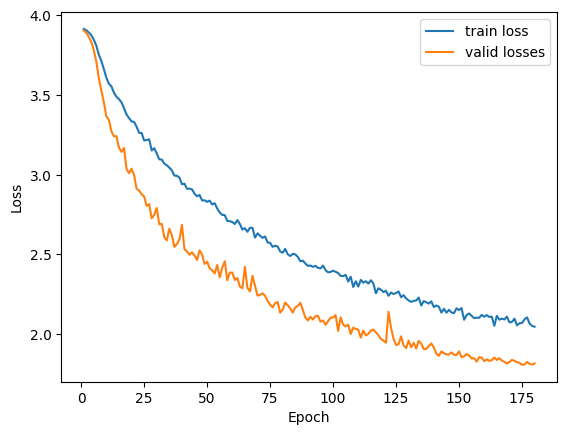

In [10]:
import matplotlib.pyplot as plt

x = range(1, num_epochs+1)
plt.plot(x, train_losses, label='train loss')
plt.plot(x, valid_losses, label='valid losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-info-2558213.png?raw=1" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [11]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

# YOUR CODE HERE: load the weights in 'checkpoints/best_val_loss.pt'
model.load_state_dict(torch.load('checkpoints/best_val_loss.pt'))

# Run test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 40/40 [00:11<00:00,  3.52it/s]

Test Loss: 1.794750


Test Accuracy: 54% (678/1250)


(1.7947498120367527, tensor(0.5424))

---
## <img src="https://github.com/karencfisher/landmark-classifier/blob/main/static_images/icons/noun-advance-2109145.png?raw=1" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [ ]:
!pytest -vv src/predictor.py

============================= test session starts =============================
platform win32 -- Python 3.12.12, pytest-8.4.2, pluggy-1.5.0 -- C:\Users\karen\Anaconda3\envs\pytorch-course\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\karen\udacity\DeepLearning\landmark_classifier
plugins: anyio-4.12.0
collecting ... collected 1 item

src/predictor.py::test_model_construction PASSED                         [100%]

============================= 1 passed in 28.40s ==============================


Allright, now we are ready to export our model using our Predictor class:

In [12]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.5).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

model.load_state_dict(torch.load('checkpoints/best_val_loss.pt', map_location='cpu'))

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)

scripted_predictor.save("checkpoints/original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])
Reusing cached mean and std


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [13]:
import torch

# Load using torch.jit.load
model_reloaded =  torch.jit.load("checkpoints/original_exported.pt")

In [14]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

100%|███████████████████████████████████████| 1250/1250 [00:38<00:00, 32.89it/s]

Accuracy: 0.5352


Finally, let's have a look at the confusion matrix of the model we are going to use in production:

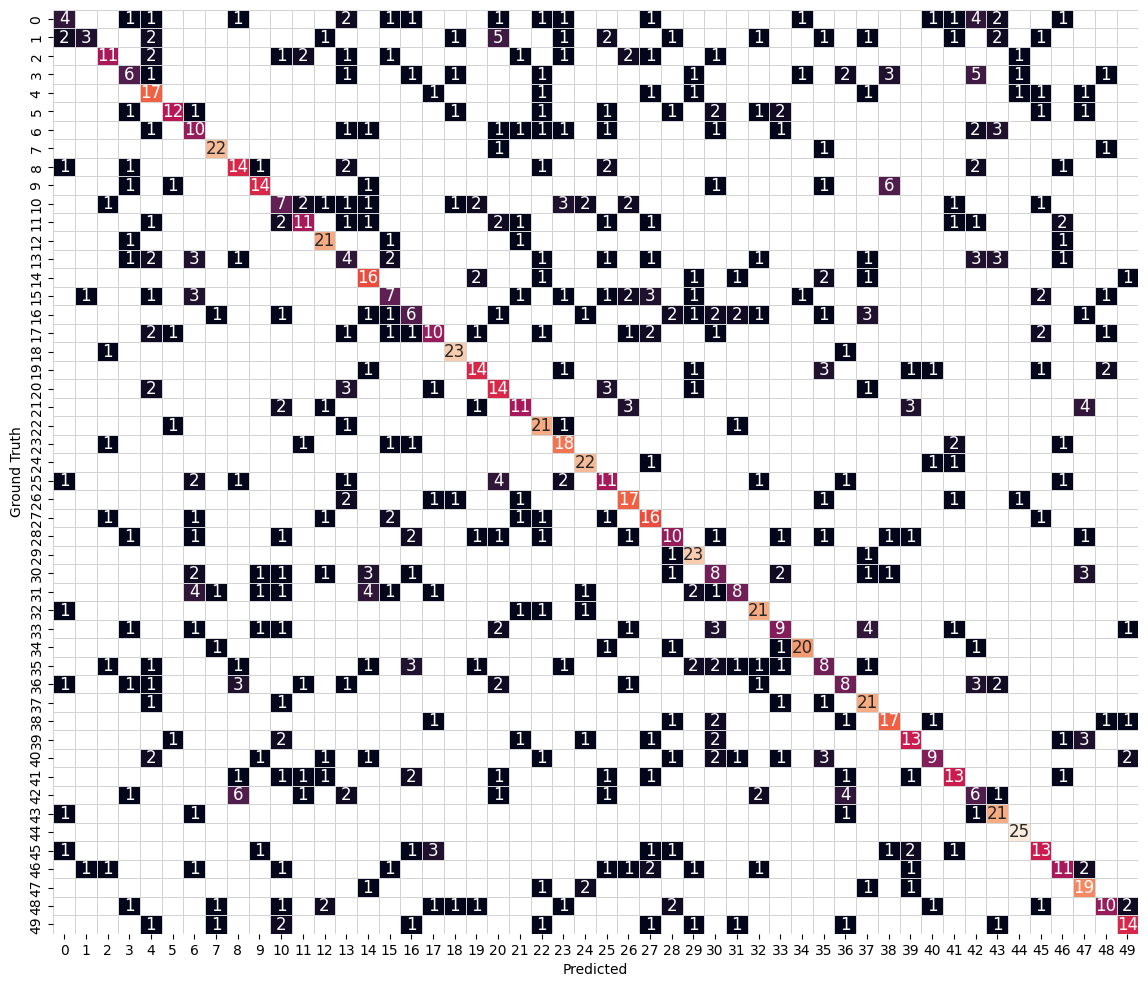

In [15]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)